<a href="https://colab.research.google.com/github/CodeBrk3R/Projects/blob/master/stock_checker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HIT PLAY Button below to use each section.**

In [ ]:
#@title get app libraries
from google.colab import files
import pandas as pd
import requests
from datetime import datetime
from matplotlib import pyplot as plt
import bs4
import time
try:
  import yfinance as yf
  from googlesearch import search
except:
  !pip install google
  !pip install yfinance
  print('----------------------------------------\n')
  import yfinance as yf
  from googlesearch import search
import numpy as np


def stock_pairplot(stock):
  ticker = yf.Ticker(stock)
  df = ticker.history(period=f"1y")
  x = df.index
  y = df['Close']
  z = df['Volume']
  fig, (ax1, ax2) = plt.subplots(2)
  fig.set_figheight(8)
  fig.set_figwidth(18)
  fig.suptitle('Performance vs Volume')
  ax1.plot(x, y)
  ax2.plot(x, z)

today = datetime.today()
year = str(today.year)
 
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)


def get_stocklist():
  stonks = input("type all the tickers you want 1yr projections for separated by a space(example: tsla aapl msft....)\n")
  print('\n')
  stonks = stonks.split(" ")
  return stonks

def get_future(x):
  url = f'https://money.cnn.com/quote/forecast/forecast.html?symb={x}'
  response = requests.get(url)
  html = response.content
  soup = bs4.BeautifulSoup(html, "html.parser")
  all_results=soup.find_all("span")
  if 'Buy' in all_results[15]:
    result = all_results[14].text
    return result
  elif 'Hold' in all_results[15]:
    result = all_results[14].text
    return result
  else:
    result = all_results[15].text
    return result

def stonks_futures(stonks):
  for item in stonks:
    try:
      fore = get_future(item)
      print(f"{item}'s 1yr projection: {fore}")
      time.sleep(1)
    except:
      print(f"{item}'s 1yr projection Not Found")
      continue

def get_stock(x,y=year):
  y=int(y)
  y1=y-1
  y2=y
  df = yf.download(x, 
  start=f'{y1}-01-01', 
  end=f'{y2}-12-31', 
  progress=False)
  return df
 
def base_plot(x,i=1):
  ticker = yf.Ticker(x)
  df = ticker.history(period=f"{i}y")
  plot = df['Close'].plot(title=f"{x}\'s stock price",figsize = (18,6),label=x)
  return plot,plt.legend()
 
def tick_plot(x,i=1):
  ticker = yf.Ticker(x)
  df = ticker.history(period=f"{i}y")
  plot = df['Close'].plot(title=f"{x}\'s stock price",figsize = (18,6))
  df['MA20'] = df['Close'].rolling(20).mean()
  plot20 = df['MA20'].plot(label='MA20')
  df['MA50'] = df['Close'].rolling(50).mean()
  plot50 = df['MA50'].plot(label='MA50')
  return plot,plot20,plot50,plt.legend()
 
def Vol_plot(x,i=1):
  ticker = yf.Ticker(x)
  df = ticker.history(period=f"{i}y")
  plot = df['Volume'].plot(title=f"{x}\'s stock Volume",figsize = (18,6))
  return plot,plt.legend()
 
def tick_status(x,y=year):
  y=str(y)
  ticker = yf.Ticker(x)
  ticker.recommendations.reset_index(inplace = True)
  indexx = [str(item[:10]) for item in ticker.recommendations['Date'].astype('str')]
  ticker.recommendations['Date']= indexx
  ticker.recommendations.set_index('Date',inplace=True)
  df = get_stock(x,y)
  result = df.join(ticker.recommendations)
  result.fillna('none',inplace=True,axis=1)
  answer = result[result['Firm'] != 'none']
  return answer[['Close','Volume','Firm','To Grade', 'From Grade']]

 
def get_news(x):
  news = [j for j in search(f'{x} stock news', tld="co.in", num=15, stop=15, pause=2)]
  return news
 
def forcast(x):
  cnn_fc = f'https://money.cnn.com/quote/forecast/forecast.html?symb={x}'
  tr_fc = f'https://www.tipranks.com/stocks/{x}/forecast'
  return print(f'{x}\'s Forcast: ','\n',tr_fc,'\n',cnn_fc)
 
def percent_plot(x,i=1):
  ticker = yf.Ticker(x)
  df = ticker.history(period=f"{i}y")
  df['returns'] = (df['Close']/ df['Close'].shift(1))-1
  return df['returns'].plot(label=x,figsize = (18,6)),plt.legend()
 
def percent_ch(x,i=1):
  ticker = yf.Ticker(x)
  df = ticker.history(period=f"{i}y")
  df['returns'] = (df['Close']/ df['Close'].shift(1))-1
  return df
 
def return_500(x):
  data = percent_plot(x)
  data2 = percent_plot('voo')
  return data,data2,plt.legend()
 
def compare_500(x):
  data = base_plot(x)
  data2 = base_plot('voo')
  return data,data2,plt.legend()
 
def best_day(x):
  ticker = yf.Ticker(x)
  df = ticker.history(period=f"1y")
  day = str(df['Volume'].idxmax())[:10]
  news = [j for j in search(f'{x} stock news {day} ', tld="co.in", num=5, stop=5, pause=2)]
  return day,news
 
def best_plot(x):
  df=get_stock(x)
  data = df['Volume'].iloc[df['Volume'].argmax()-50:df['Volume'].argmax()+50].plot(title=f'{x} best gains',figsize=(18,6))
  return data
 
def compare_2stocks(x,y):
  data = base_plot(x)
  data2 = base_plot(y)
  return data,data2,plt.legend()

def get_price(x):
  price = get_stock(x,y)['Close'].round(2).iloc[-1]
  return price

def div_yield(x):
  try:
    div = (yf.Ticker(x).dividends[-1]*4/get_price(x))*100
    div = div.round(2)
    return div
  except:
    return '0'

def analyze_list(x):
  dictt={}
  for item in x:
    try:
      dictt[item] = get_future(item)
    except:
      dictt[item] = 'NA'
      continue
  data = pd.DataFrame(dictt.items(),columns=['ticker','1yr future'])
  data['div_yield'] = [div_yield(x) for x in data['ticker']]
  data['future%'] = [x[:-1] for x in data['1yr future'].astype(str)]
  data['future%'] = pd.to_numeric(data['future%'], downcast="float")
  data.drop(['1yr future'],axis=1,inplace=True)
  data['div_yield'] = pd.to_numeric(data['div_yield'], downcast="float")
  data['potential yield%'] = data['div_yield'] + data['future%']
  data['potential yield%'] = data['potential yield%'].round(2)
  data['current_price'] = [get_stock(x,y)['Close'].round(2).iloc[-1] for x in data['ticker']]
  data['target price'] = data['potential yield%']*.01*data['current_price']+data['current_price']
  data = data.sort_values(['potential yield%'],ascending = 0)
  recomendations=[]
  for item in data['potential yield%']:
    if item > 12:
      recomendations.append('BUY')
    elif 3 < item < 12:
      recomendations.append('hold')
    else:
      recomendations.append('SELL')
  data['recomendations'] = recomendations
  return data

def get_sector(x):
  url = f'https://money.cnn.com/quote/profile/profile.html?symb={x}'
  try:  
    response = requests.get(url)
    html = response.content
    soup = bs4.BeautifulSoup(html, "html.parser")
    all_results=soup.find_all("td")
    result = all_results[9].get_text()[6:]
  except:
    return 'NA'
  return result

def get_industry(x):
  url = f'https://money.cnn.com/quote/profile/profile.html?symb={x}'
  try:  
    response = requests.get(url)
    html = response.content
    soup = bs4.BeautifulSoup(html, "html.parser")
    all_results=soup.find_all("td")
    result = all_results[10].get_text()[8:]
  except:
    return 'NA'
  return result

def current_grade(x):
  result = tick_status(x,y)
  result2 = result.iloc[-1]['To Grade']
  return result2

def check_cross(x):
  ticker = yf.Ticker(x)
  df = ticker.history(period=f"1y")
  df['MA20'] = df['Close'].rolling(20).mean()
  df['MA50'] = df['Close'].rolling(50).mean()
  data = df[['MA20','MA50']].tail(5).copy()
  if (abs(data.tail(1)['MA20'] - data.tail(1)['MA50']) < 1).bool() & (data.iloc[-1]['MA20'] > data.iloc[-2]['MA20']):
    print('20 day crossed: UP')
  elif (abs(data.tail(1)['MA20'] - data.tail(1)['MA50']) < 2).bool() & (data.iloc[-1]['MA20'] < data.iloc[-2]['MA20']):
    print('close to downward cross')
  elif (abs(data.tail(1)['MA20'] - data.tail(1)['MA50']) > 2).bool() & (data.iloc[-1]['MA20'] > data.iloc[-2]['MA20']):
    print('20 day: steady UP Trend')
  elif (abs(data.tail(1)['MA20'] - data.tail(1)['MA50']) < 1).bool() & (data.iloc[-1]['MA50'] < data.iloc[-2]['MA50']):
    print('50 day crossed: DOWN')
  elif (abs(data.tail(1)['MA20'] - data.tail(1)['MA50']) < 2).bool() & (data.iloc[-1]['MA50'] < data.iloc[-2]['MA50']):
    print('close to upward cross')
  elif (abs(data.tail(1)['MA50'] - data.tail(1)['MA20']) > 2).bool() & (data.iloc[-1]['MA50'] < data.iloc[-2]['MA50']):
    print('50 day: steady Down Trend')
  else:
    print('NA')

def get_signal(x):
  ticker = yf.Ticker(x)
  df = ticker.history(period=f"1y")
  df['MA20'] = df['Close'].rolling(20).mean()
  df['MA50'] = df['Close'].rolling(50).mean()
  data = df[['MA20','MA50']].tail(180).copy()
  data['signal'] = 0.0
  data['signal'] = np.where(data['MA20'] > data['MA50'],1.0,0.0)
  data['pos'] = data['signal'].diff()
  data.loc[(data.pos == 1),'trade']='buy'
  data.loc[(data.pos == -1),'trade']='sell'
  check = data['trade']=='buy'
  check1 = data['trade']=='sell'
  return data[check1 | check]


y = year


## **SINGLE STOCK**

What Ticker Symbol?
nrz
Current Price:  9.28 
                  MA20       MA50  signal  pos trade
Date                                               
2021-05-04  10.412075  10.422010     0.0 -1.0  sell
2021-06-11  10.438565  10.409622     1.0  1.0   buy
2021-07-13  10.369396  10.373713     0.0 -1.0  sell
            Close    Volume                     Firm           To Grade      From Grade
Date                                                                                   
2020-10-19   8.05   3312100            Credit Suisse         Outperform                
2020-10-20   8.43   6679900            Compass Point                Buy                
2020-11-23   9.76   6424900            Raymond James         Outperform                
2020-12-18   9.95   8917600  Keefe, Bruyette & Woods         Outperform  Market Perform
2021-01-22   9.79   3723800           JMP Securities  Market Outperform                
2021-02-10   9.83   6131500            Raymond James         Outperform      

(<matplotlib.axes._subplots.AxesSubplot at 0x7f742fe3b550>,
 <matplotlib.legend.Legend at 0x7f742fedd990>)

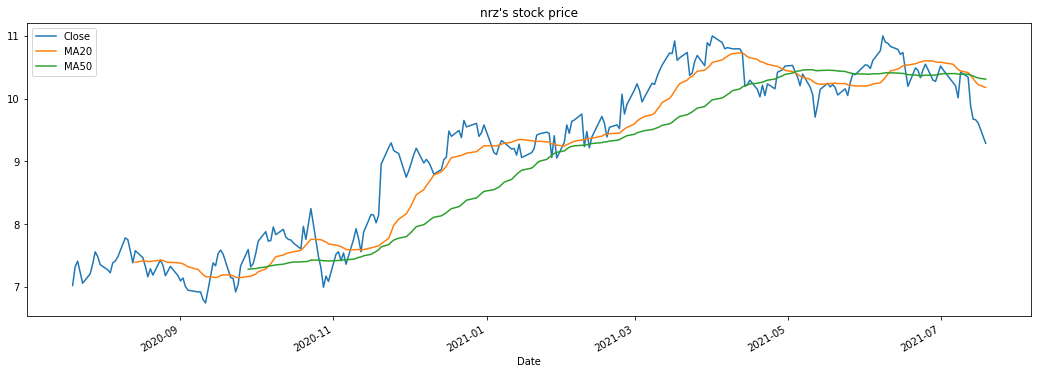

In [ ]:
#@title Start App single stock breakdown
x = input('What Ticker Symbol?\n')
print("Current Price: ",get_stock(x,y)['Close'].round(2).iloc[-1],'\n',get_signal(x))
print(tick_status(x,y).tail(10))
print('\n Dividend Yield: ',div_yield(x),'%')
print('\n','Related Links:')
for item in get_news(x):
  print(item)
print('\n')
print('Most volatile day:')
for item2 in best_day(x):
  print(item2)
print('\n')
forcast(x)
print('\n')
print(f"{x}'s 1 yr forcast price Growth: {get_future(x)}")
print('\n')
print('\n')
tick_plot(x)

# Other Analysis--


### **Stock Volume**

(<matplotlib.axes._subplots.AxesSubplot at 0x7fdbc331afd0>,
 <matplotlib.legend.Legend at 0x7fdbcbc9fa50>)

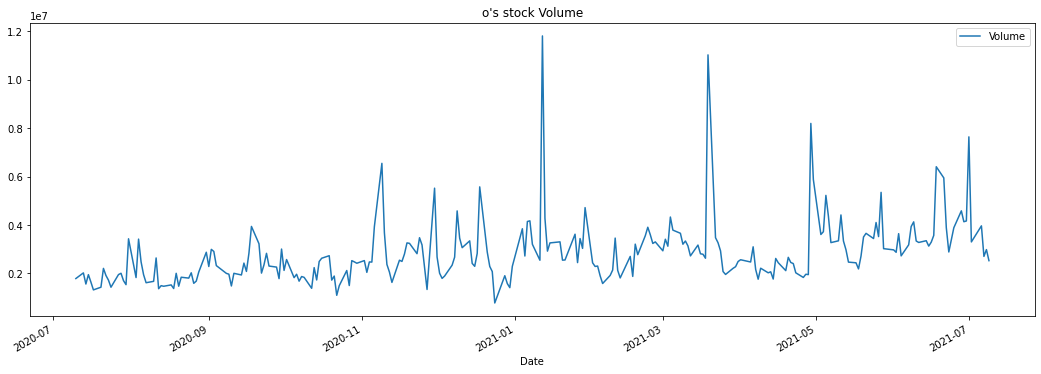

In [ ]:
#@title
Vol_plot(x)

### **S&P500 Comparison**

((<matplotlib.axes._subplots.AxesSubplot at 0x7fdbc338c210>,
  <matplotlib.legend.Legend at 0x7fdbc3450b10>),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7fdbc338c210>,
  <matplotlib.legend.Legend at 0x7fdbc337d7d0>),
 <matplotlib.legend.Legend at 0x7fdbc32c6850>)

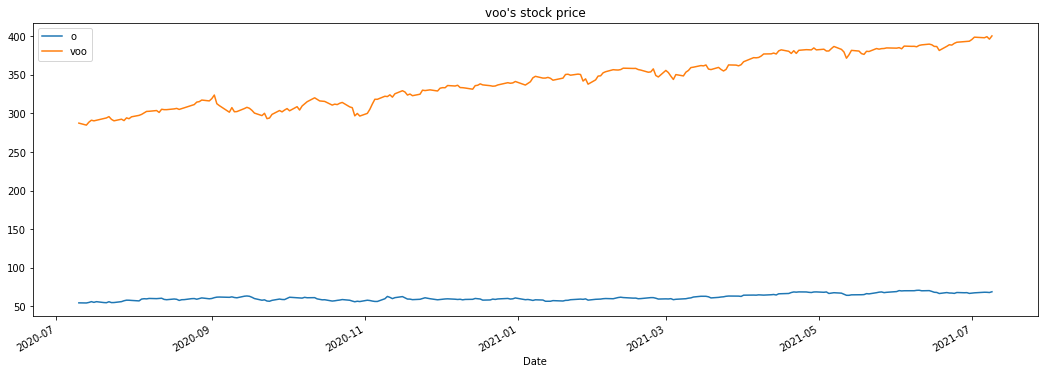

In [ ]:
#@title
compare_500(x)

## **percent Change daily comparison with S&P500**

((<matplotlib.axes._subplots.AxesSubplot at 0x7f664c061e10>,
  <matplotlib.legend.Legend at 0x7f664c012410>),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f664c061e10>,
  <matplotlib.legend.Legend at 0x7f664bfac710>),
 <matplotlib.legend.Legend at 0x7f664bfacf90>)

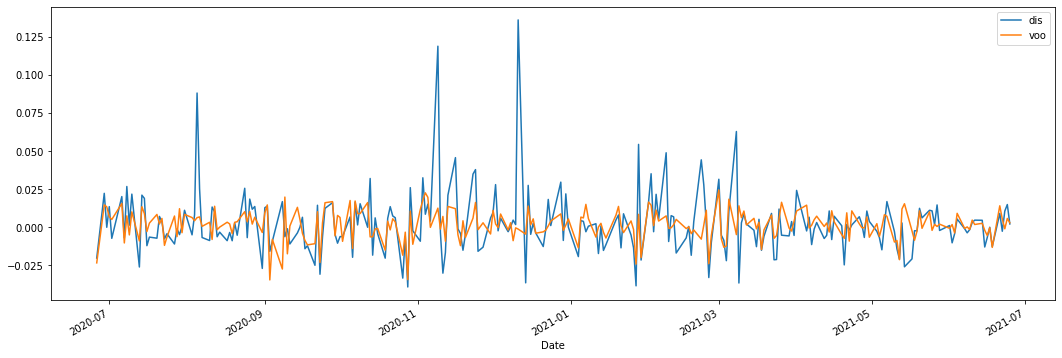

In [ ]:
#@title
return_500(x)

## **MOST Volatile Time Frame**

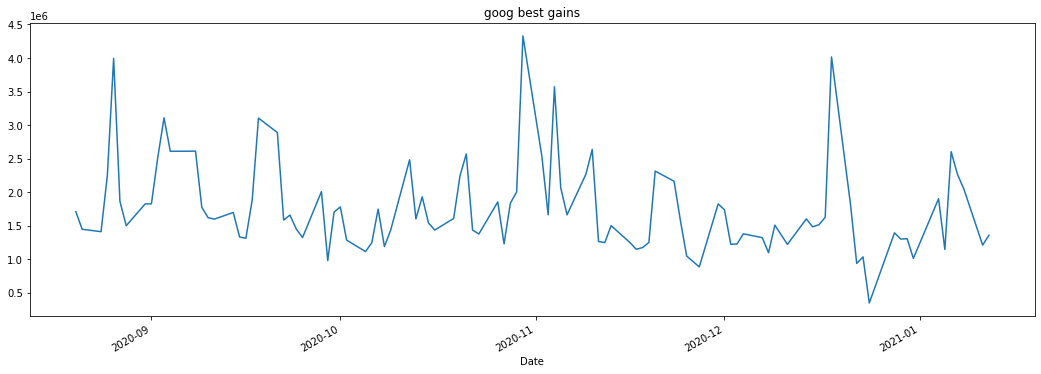

In [ ]:
#@title
best_plot(x)

## **Compare 2 stocks performance**

What is first stock to check?
dis
What is second stock to check?
voo


((<matplotlib.axes._subplots.AxesSubplot at 0x7f744924a250>,
  <matplotlib.legend.Legend at 0x7f7449280190>),
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f744924a250>,
  <matplotlib.legend.Legend at 0x7f744c1fa050>),
 <matplotlib.legend.Legend at 0x7f744c212b50>)

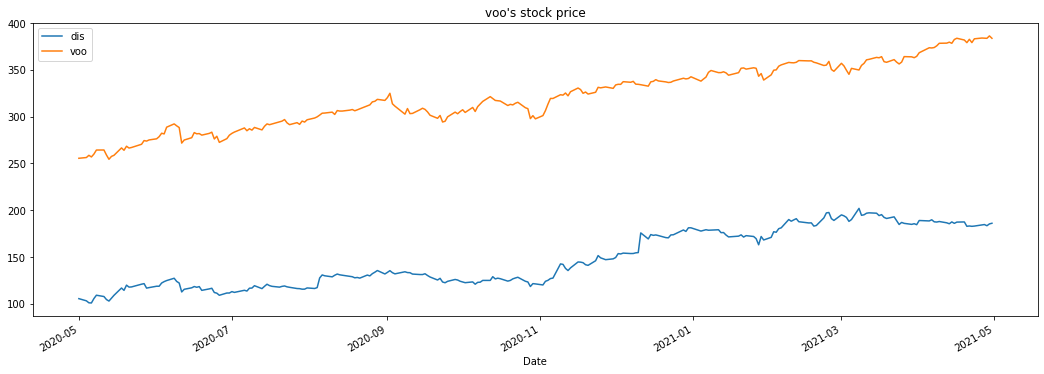

In [ ]:
#@title
stock1 = input("What is first stock to check?\n")
stock2 = input("What is second stock to check?\n")
compare_2stocks(stock1,stock2)

## **Stock vs Volume Check**

what stock ticker do you want to check?
goog


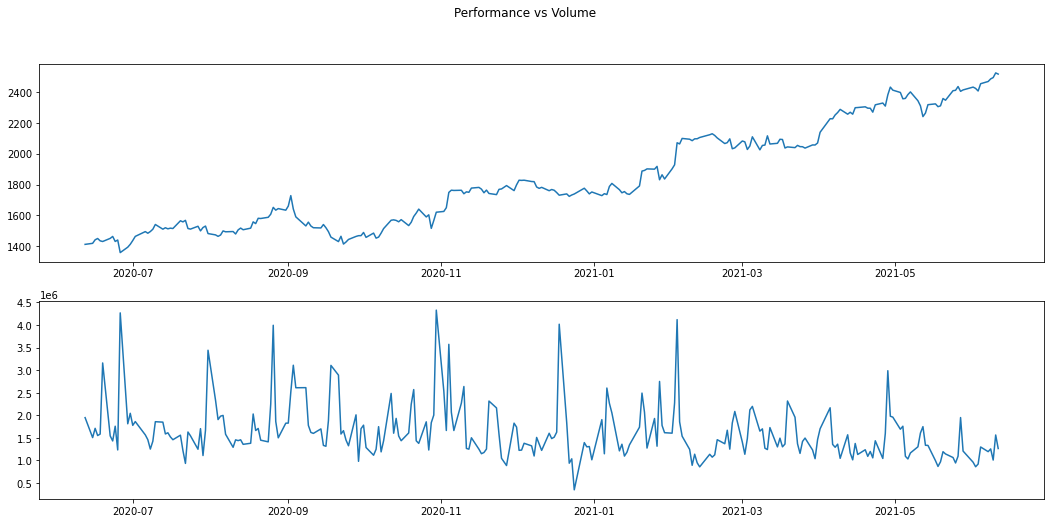

In [ ]:
#@title
stock = input("what stock ticker do you want to check?\n")
stock_pairplot(stock)

## **get a bunch of stock futures.**

In [2]:
#@title
stonks = get_stocklist()
stonks_futures(stonks)

type all the tickers you want 1yr projections for separated by a space(example: tsla aapl msft....)
msft nrz sbux adp crm googl


msft's 1yr projection: +9.92%
nrz's 1yr projection: +19.38%
sbux's 1yr projection: +14.35%
adp's 1yr projection: +5.27%
crm's 1yr projection: +16.14%
googl's 1yr projection: +9.98%
